Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint as pp
sns.set_theme()

Reading the Excel Sheets

In [2]:
excel_file = pd.ExcelFile('./Deidentified Aneurysm Genetics Study Spreadsheet Master_20210623.xlsx')
pt_table_og = pd.read_excel(excel_file, 'Sequenced Patient Database')
an_table_og = pd.read_excel(excel_file, 'Sequenced Aneurysm Database')

In [3]:
pp(pt_table_og.columns)

Index(['collaboratorsampleid', 'Subject', 'Date_SampleCollected',
       'BROADBarCode', 'batchnum', 'sex', 'sex_name', 'age', 'smokingstatus',
       'smokingstatus_name', 'familyhistory', 'numaneurysms', 'aneursymtype',
       'an1loc', 'an1vessel', 'an1sizedim1', 'an1sizedim2', 'An1size_dim3',
       'An1_ProcDate', 'an1treatmod', 'an1coilingped', 'an1ruptstatus',
       'an1occlusion', 'hunthess', 'fishergrade', 'an2loc', 'an2vessel',
       'an2sizedim1', 'an2sizedim2', 'an2ruptstatus', 'an2treatmod',
       'necksize', 'an3loc', 'an3vessel', 'an3sizedim1', 'an3sizedim2',
       'an3ruptstatus', 'an3treatmod', 'Affected member(s)',
       'Follow-up angiogram', 'Aneurysm occluded', 'Smoking Pack-yrs',
       'Comments'],
      dtype='object')


In [4]:
pp(an_table_og.columns)

Index(['BROADBarCode', 'collaboratorsampleid', 'Subject', 'Aneurysm_NumberPt',
       'subject_index', 'sex_name', 'smokingstatus_name', ' anloc', 'anvessel',
       'andim1', 'andim2', 'andim3', 'An_ProcDate', 'An_TreatMod',
       'An_CoilingPED', 'anruptstatus', 'An1_Occlusion', 'Notes',
       'Unnamed: 18'],
      dtype='object')


### Figure 1a: Aneurysm Treatment Modality

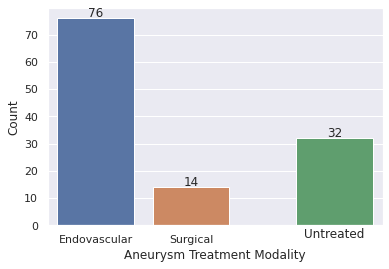

In [5]:
fig = sns.countplot(
    x='An_TreatMod',
    data=an_table_og
)
fig.set(
    xlabel='Aneurysm Treatment Modality',
    ylabel='Count'
)

offset = 0.5
bar_n = 2

# Making plot wider
plt.xlim(-0.5, bar_n + 0.5 + offset) # Original xlim is (-0.5, 3.5)

# Shifting over Untreated bar
untreated_patch = fig.patches[bar_n]
untreated_patch.set_x(untreated_patch.get_x() + offset)

# Making 'Untreated' label invisible
fig.xaxis.majorTicks[bar_n]._visible = False

# Creating new 'Untreated' label
new_label = fig.text(
    bar_n + offset, -1, 'Untreated',
    horizontalalignment = 'center',
    verticalalignment = 'top'
)


# Code for adding counts to bars on bar graphs
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
                 height + 0.5,
                 '%.0f'%(height),
                 ha = "center")
    
plt.savefig('figures/fig_1a_endo_together.png', bbox_inches='tight')
plt.show()

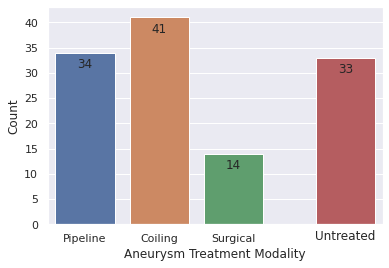

In [6]:
fig = sns.countplot(
    x='An_CoilingPED',
    data=an_table_og
)
fig.set(
    xlabel='Aneurysm Treatment Modality',
    ylabel='Count'
)

offset = 0.5
bar_n = 3

# Making plot wider
plt.xlim(-0.5, bar_n + 0.5 + offset) # Original xlim is (-0.5, 3.5)

# Shifting over Untreated bar
untreated_patch = fig.patches[bar_n]
untreated_patch.set_x(untreated_patch.get_x() + offset)

# Making 'Untreated' label invisible
fig.xaxis.majorTicks[bar_n]._visible = False

# Creating new 'Untreated' label
new_label = fig.text(
    bar_n + offset, -1, 'Untreated',
    horizontalalignment = 'center',
    verticalalignment = 'top'
)

# Code for adding counts to bars on bar graphs
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
                 height - 3,
                 '%.0f'%(height),
                 ha = "center")
    
plt.savefig('figures/fig_1a_split.png', bbox_inches='tight')
plt.show()

### Figure 1b: Aneurysm Location

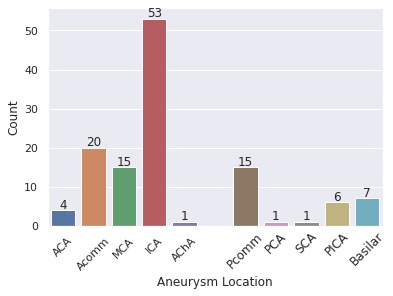

In [15]:
fig = sns.countplot(
    x='anvessel',
    data=an_table_og,
    order=['ACA', 'Acomm', 'MCA', 'ICA', 'AChA', 'Pcomm', 'PCA', 'SCA', 'PICA', 'Basilar']
)
fig.set(
    xlabel='Aneurysm Location',
    ylabel='Count'
)

offset = 1

# Making plot wider
plt.xlim(-0.5, bar_n + 0.5 + offset)

for bar_n in range(5,10):
    # Shifting over bar
    patch = fig.patches[bar_n]
    patch.set_x(patch.get_x() + offset)

    # Making label invisible
    fig.xaxis.majorTicks[bar_n]._visible = False
    
    # Grabbing label text
    label_text = fig.xaxis.majorTicks[bar_n].label1.get_text()

    # Creating new 'Untreated' label
    new_label = fig.text(
        bar_n + offset, -1, label_text,
        horizontalalignment = 'center',
        verticalalignment = 'top'
    )
    new_label.set_rotation(45)

# Code for adding counts to bars on bar graphs
i = 0
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
                 height + 0.5,
                 '%.0f'%(height),
                 ha="center")
    i += 1

plt.xticks(rotation=45)

plt.savefig('figures/fig_1b.png', bbox_inches='tight')
plt.show()

### Figure 1c: Distribution of Aneurysm Sizes, Color-Coded by Rupture Status

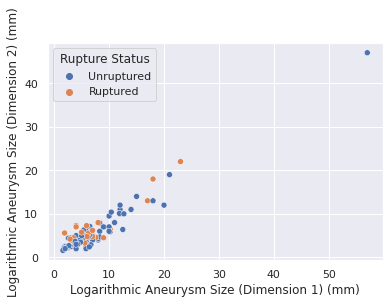

In [8]:
fig = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus'
)
fig.set(
    xlabel='Logarithmic Aneurysm Size (Dimension 1) (mm)',
    ylabel='Logarithmic Aneurysm Size (Dimension 2) (mm)'
)
fig.legend_.set_title('Rupture Status')

plt.savefig('figures/fig_1c_original.png', bbox_inches='tight')

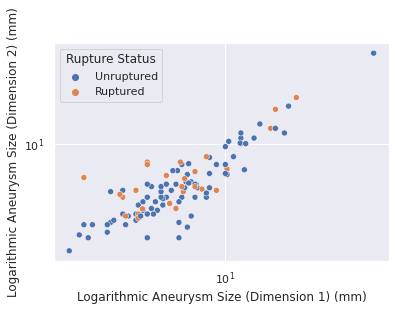

In [9]:
fig = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus'
)
fig.set(
    xlabel='Logarithmic Aneurysm Size (Dimension 1) (mm)',
    ylabel='Logarithmic Aneurysm Size (Dimension 2) (mm)'
)
fig.legend_.set_title('Rupture Status')

plt.xscale('log')
plt.yscale('log')

plt.savefig('figures/fig_1c_log.png', bbox_inches='tight')

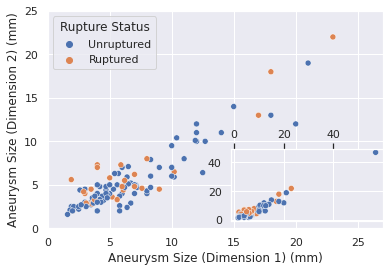

In [10]:
fig = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus'
)
fig.set(
    xlabel='Aneurysm Size (Dimension 1) (mm)',
    ylabel='Aneurysm Size (Dimension 2) (mm)'
)
fig.legend_.set_title('Rupture Status')
fig.set_xlim(0, 27)
fig.set_ylim(0, 25)

ax = plt.axes([.55,.15,.35,.25])
#ax.yaxis.tick_right()
ax.xaxis.tick_top()
inset_plot = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus',
    ax=ax
)

inset_plot.legend_.remove()
inset_plot.set(
    xlabel=None,
    ylabel=None
)

plt.savefig('figures/fig_1c_inset_zoom_out.png', bbox_inches='tight')

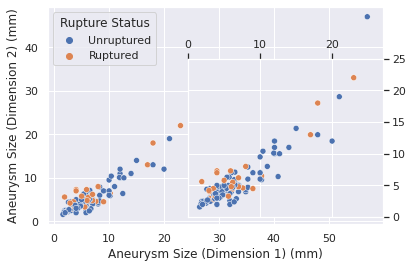

In [11]:
fig = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus'
)
fig.set(
    xlabel='Aneurysm Size (Dimension 1) (mm)',
    ylabel='Aneurysm Size (Dimension 2) (mm)'
)
fig.legend_.set_title('Rupture Status')

ax = plt.axes([.45,.15,.45,.55])
ax.yaxis.tick_right()
ax.xaxis.tick_top()
inset_plot = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus',
    ax=ax
)
ax.set_xlim(0, 27)
ax.set_ylim(0, 25)

inset_plot.legend_.remove()
inset_plot.set(
    xlabel=None,
    ylabel=None
)

plt.savefig('figures/fig_1c_inset_zoom_in.png', bbox_inches='tight')

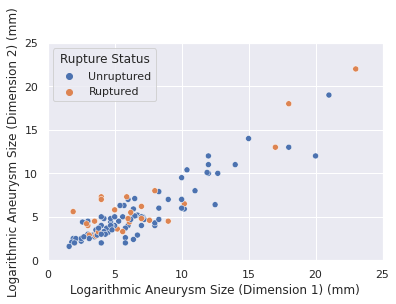

In [12]:
fig = sns.scatterplot(
    x='andim1',
    y='andim2',
    data=an_table_og,
    hue='anruptstatus'
)
fig.set(
    xlabel='Logarithmic Aneurysm Size (Dimension 1) (mm)',
    ylabel='Logarithmic Aneurysm Size (Dimension 2) (mm)'
)
fig.legend_.set_title('Rupture Status')
fig.set_xlim(0,25)
fig.set_ylim(0,25)

plt.savefig('figures/fig_1c_zoom_in.png', bbox_inches='tight')

### Figure 1d: Smoking Status

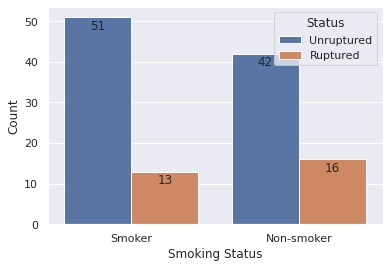

In [13]:
fig = sns.countplot(
    x='smokingstatus_name',
    hue='anruptstatus',
    data=an_table_og
)
fig.legend_.set_title('Status')
fig.set(
    xlabel='Smoking Status',
    ylabel='Count'
)

# Code for adding counts to bars on bar graphs
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
                 height - 3,
                 '%.0f'%(height),
                 ha = "center")

plt.savefig('figures/fig_1d_smoking.png', bbox_inches='tight')
plt.show()

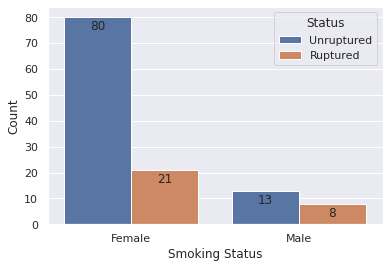

In [14]:
fig = sns.countplot(
    x='sex_name',
    hue='anruptstatus',
    data=an_table_og
)
fig.legend_.set_title('Status')
fig.set(
    xlabel='Smoking Status',
    ylabel='Count'
)

# Code for adding counts to bars on bar graphs
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
                 height - 5,
                 '%.0f'%(height),
                 ha = "center")

plt.savefig('figures/fig_1d_sex.png', bbox_inches='tight')
plt.show()